# Summarizing data with PCA

This activity is meant to explore the results of applying PCA to a dataset.  Below, a dataset from a credit card company is loaded and displayed.  This dataset contains customer data pertaining to demographic and payment information as well as basic demographics.  The final column `default payment next month` is what we want to create profiles for.  

You are to use PCA and reduce the dimensionality of the data to 2 and 3 dimensions.  Then, draw scatterplots of the resulting data and color them by `default`.  Does it seem that 2 or 3 principal components will seperate the data into clear groups?  Why or why not?  You should post your visualizations and argument for whether the components offer more succinct data representations on the discussion board for this activity.  (Note: In this assignment you should use the sklearn version of `PCA`.)

## Imports

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# import seaborn as sns
# from mpl_toolkits import mplot3d
# import numpy as np

In [93]:
pd.set_option("display.max_columns", None)

## Data Load and Display

In [94]:
df = pd.read_csv("./data/credit.csv")

### Rename and Drop

In [95]:
df = df.rename(columns={"default.payment.next.month": "will_default"}).drop(
    columns="ID"
)

In [96]:
# df.info()
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,will_default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Into to Plotting in 3D

Below, example plots are made with both `matplotlib` and with `plotly` to demonstrate how to construct three dimensional plots.  

`matplotlib`

In `matplotlib` an `axes` object is created where the projection is specified as '3d'.  Then, the `axes` are use to plot a 3D object on.  Below, a scatter plot is built, but there are many 3D objects that can be created in addition to points.  For more information see the documentation on 3D plotting [here](https://matplotlib.org/stable/api/toolkits/mplot3d.html?highlight=3d).


`plotly`

Use the `scatter_3d` function directly.

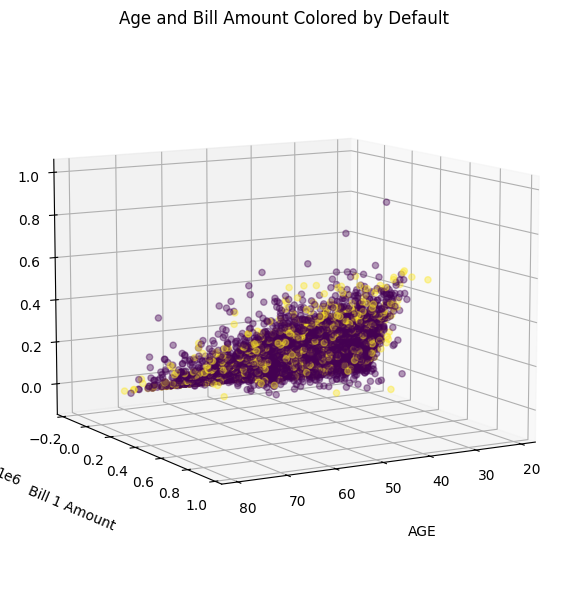

In [97]:
plt.figure(figsize=(6, 6))
ax = plt.axes(projection="3d")
ax.scatter3D(
    df["AGE"],
    df["BILL_AMT1"],
    df["BILL_AMT2"],
    c=df["will_default"],
    alpha=0.4,
)
ax.set_xlabel("AGE", labelpad=20)
ax.set_ylabel("Bill 1 Amount", labelpad=20)
ax.set_zlabel("Bill 2 Amount", labelpad=20)
ax.view_init(10, 60)
plt.title("Age and Bill Amount Colored by Default")
plt.tight_layout()

In [98]:
px.scatter_3d(
    data_frame=df,
    x="AGE",
    y="BILL_AMT1",
    z="BILL_AMT2",
    color="will_default",
)

## Correlation Coefficients

### Calculate and Display the Coefficients

In [99]:
corr = df.corr()

In [100]:
display(corr)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,will_default
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,-0.044008,-0.033642,-0.031183,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,0.082316,0.023581,0.018749,0.013002,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,0.034345,-0.023472,-0.021602,-0.024909,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.187068,0.189859,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.234887,0.235257,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.208473,0.237295,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.202812,0.225816,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614
PAY_5,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,0.816900,0.206684,0.226913,0.243335,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149


In [101]:
# sns.heatmap(corr, annot=False)
fig = px.imshow(corr, title="Correlation Coefficients", height=700, width=700)
fig.show()

### Constant Lines or Blocks of Color --> No Change in Correlation --> Lots of Redundancy in Data

## Perform the PCA

### Scale

In [102]:
scaling = StandardScaler()
scaling.fit(df)
Scaled_data = scaling.transform(df)

### PCA

In [103]:
r = 3
principal = PCA(n_components=r)
principal.fit(Scaled_data)
x = principal.transform(Scaled_data)

In [105]:
df_pca = pd.DataFrame(x, columns=["component_" + str(k + 1) for k in range(r)])
df_pca.head()

,component_1,component_2,component_3
0,-1.800976,-1.270335,-0.573975
1,-0.671427,-2.406281,1.038095
2,-0.858546,-0.969780,0.469094
3,-0.210006,-0.706125,-0.779725
4,-0.860083,0.002949,-1.039786
